## Calculate GWP based on AGWP output

In [1]:
harm = False
if harm:
    filepath= r"./output/drydep_59_"
else:
    filepath= r"./output/"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import matplotlib.patches as mpatches
from matplotlib import gridspec
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))


Bad key "text.kerning_factor" on line 4 in
/home/masan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#IPCC AR6 values
agwp100_CO2 = 0.0895
agwp20_CO2 = 0.0243 
agwp500_CO2 = 0.314 

In [4]:
model_dict = { 'GFDL_nudge':'GFDL',
               'OSLOCTM3':'OsloCTM',
               'INCA':'INCA',
               'UKCA':'UKCA',
               'WACCM6-2deg':'WACCM',
               'GFDL-emi':'GFDL-emi',
               'OSLOCTM3-emi':'OsloCTM-emi'
             }

sorted_array = ['GFDL','OsloCTM','INCA','UKCA','WACCM','GFDL-emi','OsloCTM-emi']

In [5]:
df_table_agwp = pd.read_csv(filepath+'table_h2_agwp.csv',index_col=0)
df_table_agwp.rename(index=model_dict, inplace=True)
df_table_agwp

,h2_agwp_ch4,h2_agwp_o3,h2_agwp_h2o,h2_agwp_ch4ind_o3,h2_agwp_ch4ind_h2o
OsloCTM,0.43,0.22,0.17,0.25,0.06
WACCM,0.46,0.18,0.05,0.28,0.02
INCA,0.43,0.15,0.11,0.14,0.04
GFDL-emi,0.39,0.39,0.25,nan,nan
OsloCTM-emi,0.44,0.22,0.18,0.26,0.06
UKCA,0.51,0.17,nan,0.18,nan
GFDL,0.44,0.21,0.16,0.21,0.13


In [6]:
rename_columns = {'h2_agwp_ch4':'gwp_ch4',
                  'h2_agwp_o3':'gwp_o3',
                  'h2_agwp_h2o':'gwp_h2o',
                  'h2_agwp_ch4ind_o3':'gwp_ch4ind_o3',
                  'h2_agwp_ch4ind_h2o': 'gwp_ch4ind_h2o'}

## GWP 100

In [7]:
df_table_gwp_100 = df_table_agwp/agwp100_CO2
df_table_gwp_100.rename(columns=rename_columns,inplace=True)
df_table_gwp_100

,gwp_ch4,gwp_o3,gwp_h2o,gwp_ch4ind_o3,gwp_ch4ind_h2o
OsloCTM,4.85,2.44,1.94,2.85,0.70
WACCM,5.11,1.97,0.58,3.13,0.28
INCA,4.85,1.64,1.27,1.53,0.46
GFDL-emi,4.30,4.34,2.80,nan,nan
OsloCTM-emi,4.96,2.49,1.97,2.91,0.72
UKCA,5.73,1.85,nan,2.00,nan
GFDL,4.92,2.34,1.80,2.35,1.41


In [8]:
df_table_gwp_100 = df_table_gwp_100.fillna(0.0)
df_table_gwp_100_out = pd.DataFrame(columns=['CH4','O3','StratH2O'],index=df_table_gwp_100.index)

df_table_gwp_100_out['O3'] = df_table_gwp_100['gwp_o3']+df_table_gwp_100['gwp_ch4ind_o3']
df_table_gwp_100_out['CH4']=df_table_gwp_100['gwp_ch4']
df_table_gwp_100_out['StratH2O'] = df_table_gwp_100['gwp_h2o']+df_table_gwp_100['gwp_ch4ind_h2o']
df_table_gwp_100_out=df_table_gwp_100_out.reindex(sorted_array)
df_table_gwp_100_out.replace(0,np.nan,inplace=True)


df_table_gwp_100_out.loc['Model mean'] = df_table_gwp_100_out.drop(['GFDL-emi','OsloCTM-emi']).mean()
df_table_gwp_100_out['Total'] = df_table_gwp_100_out[['O3','CH4','StratH2O']].sum(axis=1) 
df_table_gwp_100_out

,CH4,O3,StratH2O,Total
GFDL,4.92,4.69,3.21,12.8
OsloCTM,4.85,5.29,2.64,12.8
INCA,4.85,3.17,1.73,9.76
UKCA,5.73,3.85,nan,9.59
WACCM,5.11,5.10,0.85,11.1
GFDL-emi,4.30,4.34,2.80,11.4
OsloCTM-emi,4.96,5.40,2.69,13.0
Model mean,5.09,4.42,2.11,11.6


Table X: GWP100 for H$_2$ for the individual models. Note that UKCA does not have an estimate for stratospheric H2O. The model means are the mean of the model results for the concentration driven runs, hence excluding OsloCTM-emi and GFDL-emi in the mean. The GWP100 values are calculated by dividing the AGWP100 values with AGWP100 for CO2 of 0.0895 10-12 W m-2 kg-1 yr from IPCC AR6 Table 7.SM.6 

## GWP 500

In [9]:
df_table_gwp_500 = df_table_agwp/agwp500_CO2
df_table_gwp_500.rename(columns=rename_columns,inplace=True)
df_table_gwp_500

,gwp_ch4,gwp_o3,gwp_h2o,gwp_ch4ind_o3,gwp_ch4ind_h2o
OsloCTM,1.38,0.70,0.55,0.81,0.20
WACCM,1.46,0.56,0.16,0.89,0.08
INCA,1.38,0.47,0.36,0.44,0.13
GFDL-emi,1.23,1.24,0.80,nan,nan
OsloCTM-emi,1.41,0.71,0.56,0.83,0.20
UKCA,1.63,0.53,nan,0.57,nan
GFDL,1.40,0.67,0.51,0.67,0.40


In [10]:
df_table_gwp_500 = df_table_gwp_500.fillna(0.0)
df_table_gwp_500_out = pd.DataFrame(columns=['CH4','O3','StratH2O'],index=df_table_gwp_500.index)

df_table_gwp_500_out['O3'] = df_table_gwp_500['gwp_o3']+df_table_gwp_500['gwp_ch4ind_o3']
df_table_gwp_500_out['CH4']=df_table_gwp_500['gwp_ch4']
df_table_gwp_500_out['StratH2O'] = df_table_gwp_500['gwp_h2o']+df_table_gwp_500['gwp_ch4ind_h2o']
df_table_gwp_500_out=df_table_gwp_500_out.reindex(sorted_array)
df_table_gwp_500_out.replace(0,np.nan,inplace=True)

df_table_gwp_500_out.loc['Model mean'] = df_table_gwp_500_out.drop(['GFDL-emi','OsloCTM-emi']).mean()

#df_table_gwp_500_out['Total'] = df_table_gwp_500_out['O3'] + df_table_gwp_500_out['CH4'] + df_table_gwp_500_out['StratH2O']
df_table_gwp_500_out['Total'] =  df_table_gwp_500_out[['O3','CH4','StratH2O']].sum(axis=1) 
df_table_gwp_500_out

,CH4,O3,StratH2O,Total
GFDL,1.40,1.34,0.91,3.65
OsloCTM,1.38,1.51,0.75,3.64
INCA,1.38,0.90,0.49,2.78
UKCA,1.63,1.10,nan,2.73
WACCM,1.46,1.45,0.24,3.15
GFDL-emi,1.23,1.24,0.80,3.26
OsloCTM-emi,1.41,1.54,0.77,3.72
Model mean,1.45,1.26,0.60,3.31


Table X: GWP500 for H$_2$ for the individual models. Note that UKCA does not have an estimate for stratospheric H2O. The model means are the mean of the model results for the concentration driven runs, hence excluding OsloCTM-emi and GFDL-emi in the mean. The AGWP500 for hydrogen will be identical to the AGWP100 for hydrogen. The GWP500 values are calculated by dividing the AGWP500 with AGWP100 for CO2 of 0.314 10-12 W m-2 kg-1 yr from IPCC AR6 Table 7.SM.6

## GWP 20

For GWP20: 
For AGWP20, perturbations tied to CH4 will still exist at the 10% level after 20 years, and the steady-state approximation can be corrected if we know the time scale of the CH4 perturbation.

The timescale of the perturbation (PT) it the total methane lifetime times the feedback factor (FF). 

The pertubation lifetime of methane in IPCC AR6 WGI report (Section 6.3.1):
11.8 +/- 1.8 years.

All the RF related to methane decay as exp(-t/PT) where t is time.

Therefore the AGWP_20 = AGWP_100 * (1-exp(20/PT)
for ch4, ch4ind o3 and ch4ind h2o.

In [11]:
PT = 11.8
print(PT)
adjust_20 =1-np.exp(-20./PT)

print(adjust_20)

11.8
0.8163852110562757


In [12]:
df_table_agwp_20 = df_table_agwp
df_table_agwp_20['h2_agwp_ch4']=df_table_agwp_20['h2_agwp_ch4']*adjust_20
df_table_agwp_20['h2_agwp_ch4ind_o3']=df_table_agwp_20['h2_agwp_ch4ind_o3']*adjust_20
df_table_agwp_20['h2_agwp_ch4ind_h2o']=df_table_agwp_20['h2_agwp_ch4ind_h2o']*adjust_20

In [13]:
df_table_gwp_20 = df_table_agwp_20/agwp20_CO2
df_table_gwp_20.rename(columns=rename_columns,inplace=True)
df_table_gwp_20

,gwp_ch4,gwp_o3,gwp_h2o,gwp_ch4ind_o3,gwp_ch4ind_h2o
OsloCTM,14.6,8.98,7.13,8.56,2.11
WACCM,15.4,7.25,2.12,9.41,0.83
INCA,14.6,6.04,4.69,4.61,1.38
GFDL-emi,12.9,16.0,10.3,nan,nan
OsloCTM-emi,14.9,9.16,7.27,8.76,2.16
UKCA,17.2,6.82,nan,6.01,nan
GFDL,14.8,8.63,6.63,7.06,4.23


In [14]:
df_table_gwp_20 = df_table_gwp_20.fillna(0.0)
df_table_gwp_20_out = pd.DataFrame(columns=['CH4','O3','StratH2O'],index=df_table_gwp_20.index)

df_table_gwp_20_out['O3'] = df_table_gwp_20['gwp_o3']+df_table_gwp_20['gwp_ch4ind_o3']
df_table_gwp_20_out['CH4']=df_table_gwp_20['gwp_ch4']
df_table_gwp_20_out['StratH2O'] = df_table_gwp_20['gwp_h2o']+df_table_gwp_20['gwp_ch4ind_h2o']
df_table_gwp_20_out=df_table_gwp_20_out.reindex(sorted_array)
df_table_gwp_20_out.replace(0,np.nan,inplace=True)

df_table_gwp_20_out.loc['Model mean'] = df_table_gwp_20_out.drop(['GFDL-emi','OsloCTM-emi']).mean()

df_table_gwp_20_out['Total'] = df_table_gwp_20_out[['O3','CH4','StratH2O']].sum(axis=1) 

df_table_gwp_20_out

,CH4,O3,StratH2O,Total
GFDL,14.8,15.7,10.9,41.4
OsloCTM,14.6,17.5,9.24,41.4
INCA,14.6,10.6,6.08,31.3
UKCA,17.2,12.8,nan,30.1
WACCM,15.4,16.7,2.95,35.0
GFDL-emi,12.9,16.0,10.3,39.2
OsloCTM-emi,14.9,17.9,9.42,42.3
Model mean,15.3,14.7,7.28,37.3


Table X: GWP20 for H$_2$ for the individual models. Note that UKCA does not have an estimate for stratospheric H2O. The model means are the mean of the model results for the concentration driven runs, hence excluding OsloCTM-emi and GFDL-emi in the mean. For AGWP20, perturbations tied to CH4 will still exist after 20 years, and the steady-state approximation has been corrected. All the RF related to methane decay as exp(-t/PT) where t is time and PT is the timescale of the perturbation, given as the total methane lifetime times the feedback factor (FF). Using numbers from Prather et al 2012 (FF=1.47,LT=9,1) PT is 13.4.
For AGWP20 due to methane and the methane induced ozone and stratospheric water vapor, the AGWP100 values are adjusted by (1-exp(-20/PT)). The AGWP20 values for the rest of the components are as the AGWP100 values. The GWP20 values are calculated by dividing the AGWP20 with AGWP20 for CO2 of 0.0243 10-12 W m-2 kg-1 yr from IPCC AR6 Table 7.SM.6

## Uncertainty calculations

First defining some common values for uncertainty calculations on all time scales:

In [15]:
sigma_drydep = 15
sigma_rf_methane = 0.20
sigma_ff_ch4 = 0.07
#Specific RF for CH4 [mW m-2 ppb-1] Etminan et al., 2016
spec_rf_ch4 = 0.44800

#0.389 in IPCC AR6
#The adjustment is –14% ± 15%
spec_rf_ch4 = spec_rf_ch4*(1.0-0.14)

df_uncertainty_input = pd.read_csv(filepath+'uncertainty_input.txt',index_col=0)
print(df_uncertainty_input)
delta_burden = df_uncertainty_input['delta_burden'].values[0]
sigma_burden = df_uncertainty_input['sigma_burden'].values[0]
loss = df_uncertainty_input['loss'].values[0]
sigma_atmloss = df_uncertainty_input['sigma_atmloss'].values[0]
sigma_h2_ff = df_uncertainty_input['sigma_h2_ff'].values[0]
tau = df_uncertainty_input['tau'].values[0]
ff_h2 = df_uncertainty_input['ff_h2'].values[0]
ff_ch4 = df_uncertainty_input['ff_ch4'].values[0]
delta_flux_CH4 = df_uncertainty_input['delta_flux_CH4'].values[0]
delta_flux_CH4_dir = delta_flux_CH4*1.0/ff_ch4
sigma_delta_flux_CH4_dir = df_uncertainty_input['sigma_delta_flux_CH4_dir'].values[0]
print(df_table_agwp)
print(df_table_agwp.drop(labels=['GFDL-emi', 'OsloCTM-emi'])['h2_agwp_h2o'])
sigma_rf_o3 =np.std(df_table_agwp.drop(labels=['GFDL-emi', 'OsloCTM-emi'])['h2_agwp_o3']/tau)
sigma_rf_h2o = np.std(df_table_agwp.drop(labels=['GFDL-emi', 'OsloCTM-emi'])['h2_agwp_h2o']/tau)

   delta_burden  sigma_burden  loss  sigma_atmloss  sigma_h2_ff  ff_h2  tau  \
0          18.5          0.17  82.7           3.03         0.01   0.99 2.35   

   ff_ch4  delta_flux_CH4  sigma_delta_flux_CH4_dir  
0    1.45            3.78                      1.22  
             h2_agwp_ch4  h2_agwp_o3  h2_agwp_h2o  h2_agwp_ch4ind_o3  \
OsloCTM             0.35        0.22         0.17               0.21   
WACCM               0.37        0.18         0.05               0.23   
INCA                0.35        0.15         0.11               0.11   
GFDL-emi            0.31        0.39         0.25                nan   
OsloCTM-emi         0.36        0.22         0.18               0.21   
UKCA                0.42        0.17          nan               0.15   
GFDL                0.36        0.21         0.16               0.17   

             h2_agwp_ch4ind_h2o  
OsloCTM                    0.05  
WACCM                      0.02  
INCA                       0.03  
GFDL-emi            

### GWP100

Values specific for this GWP100:

In [16]:
sigma_agwp100CO2 = 0.26/2*agwp100_CO2

gwp100 = df_table_gwp_100_out['Total']['Model mean']

Defining a table with uncertainties:

In [17]:
pd.options.display.float_format = '{:,.3g}'.format
df_uncertainties_GWP100 = pd.DataFrame({"Component":["AGWP_CO2", "Delta H2 burden", "H2 feedback factor", "Soil sink"], "Absolute uncertainty":[sigma_agwp100CO2, sigma_burden, sigma_h2_ff, sigma_drydep], "Percentage uncertainty contribution":[sigma_agwp100CO2/agwp100_CO2, sigma_burden/delta_burden, sigma_h2_ff/ff_h2, sigma_drydep/loss]})
df_uncertainties_GWP100.set_index("Component", inplace=True)
df_uncertainties_GWP100.loc["Atmospheric loss H2"]=[sigma_atmloss, sigma_atmloss/loss]
df_uncertainties_GWP100.loc["Radiative efficiency CH4"]=[sigma_rf_methane*spec_rf_ch4, sigma_rf_methane*delta_flux_CH4*tau*agwp100_CO2/gwp100]
df_uncertainties_GWP100.loc["CH4 feedback factor"]=[sigma_ff_ch4, sigma_ff_ch4*delta_flux_CH4_dir*spec_rf_ch4*tau*agwp100_CO2/gwp100]
df_uncertainties_GWP100.loc["Delta flux CH4"]=[sigma_delta_flux_CH4_dir, sigma_delta_flux_CH4_dir*ff_ch4*spec_rf_ch4*tau*agwp100_CO2/gwp100]
df_uncertainties_GWP100.loc["H2O ERF"]=[sigma_rf_h2o, sigma_rf_h2o*tau*agwp100_CO2/gwp100]
df_uncertainties_GWP100.loc["O3 ERF"]=[sigma_rf_o3, sigma_rf_o3*tau*agwp100_CO2/gwp100]

Full uncertainty calculation:

In [18]:
scaled_sigma_methane = spec_rf_ch4**2*delta_flux_CH4**2*((sigma_rf_methane)**2 + (sigma_ff_ch4/ff_ch4)**2 + (sigma_delta_flux_CH4_dir/delta_flux_CH4_dir)**2)
sigma = gwp100*np.sqrt((sigma_agwp100CO2/agwp100_CO2)**2 + (sigma_h2_ff/ff_h2)**2+ (sigma_burden/delta_burden)**2 +1/(loss)**2*(sigma_drydep**2 + sigma_atmloss**2) + (tau*agwp100_CO2/gwp100)**2*( scaled_sigma_methane + sigma_rf_h2o**2 + sigma_rf_o3**2))

Adding total to table and printing

In [19]:
df_uncertainties_GWP100.loc["Total"]=[sigma, sigma/gwp100]
#df_uncertainties_GWP100['Percent of uncertainty'] = 1-gwp100*np.sqrt((sigma/gwp100)**2 - df_uncertainties_GWP100['Percentage uncertainty contribution']**2)/sigma
df_uncertainties_GWP100["GWP uncertainty of term alone"] = df_uncertainties_GWP100['Percentage uncertainty contribution']*gwp100
print(df_uncertainties_GWP100)

                          Absolute uncertainty  \
Component                                        
AGWP_CO2                                0.0116   
Delta H2 burden                          0.173   
H2 feedback factor                     0.00631   
Soil sink                                   15   
Atmospheric loss H2                       3.03   
Radiative efficiency CH4                0.0771   
CH4 feedback factor                       0.07   
Delta flux CH4                            1.22   
H2O ERF                                 0.0204   
O3 ERF                                  0.0115   
Total                                     2.64   

                          Percentage uncertainty contribution  \
Component                                                       
AGWP_CO2                                                 0.13   
Delta H2 burden                                       0.00934   
H2 feedback factor                                    0.00638   
Soil sink               

### GWP20

In [20]:
sigma_agwp20CO2 = 0.18/2*agwp20_CO2

gwp20 = df_table_gwp_20_out['Total']['Model mean']

sigma_pt_ch4 = 1.8/2.
sigma_adjust_20 = np.exp(-20/PT)*20*(sigma_pt_ch4/PT)
print(sigma_adjust_20)
print(adjust_20)

0.28009035601585064
0.8163852110562757


In [21]:
df_uncertainties_GWP20 = pd.DataFrame({"Component":["AGWP_CO2", "Delta H2 burden", "H2 feedback factor", "Soil sink"], "Absolute uncertainty":[sigma_agwp20CO2, sigma_burden, sigma_h2_ff, sigma_drydep], "Percentage uncertainty contribution":[sigma_agwp20CO2/agwp20_CO2, sigma_burden/delta_burden, sigma_h2_ff/ff_h2, sigma_drydep/loss]})
df_uncertainties_GWP20.set_index("Component", inplace=True)
df_uncertainties_GWP20.loc["Atmospheric loss H2"]=[sigma_atmloss, sigma_atmloss/loss]
df_uncertainties_GWP20.loc["Adjust for 20 years CH4 PT"]=[sigma_pt_ch4, sigma_adjust_20/adjust_20]
df_uncertainties_GWP20.loc["Radiative efficiency CH4"]=[sigma_rf_methane*spec_rf_ch4, sigma_rf_methane*delta_flux_CH4*tau*agwp20_CO2/gwp20]
df_uncertainties_GWP20.loc["CH4 feedback factor"]=[sigma_ff_ch4, sigma_ff_ch4*delta_flux_CH4_dir*spec_rf_ch4*tau*agwp20_CO2/gwp20]
df_uncertainties_GWP20.loc["Delta flux CH4"]=[sigma_delta_flux_CH4_dir, sigma_delta_flux_CH4_dir*ff_ch4*spec_rf_ch4*tau*agwp20_CO2/gwp20]
df_uncertainties_GWP20.loc["H2O ERF"]=[sigma_rf_h2o, sigma_rf_h2o*tau*agwp20_CO2/gwp20]
df_uncertainties_GWP20.loc["O3 ERF"]=[sigma_rf_o3, sigma_rf_o3*tau*agwp20_CO2/gwp20]

Full uncertainty calculation:

In [22]:
scaled_sigma_methane = spec_rf_ch4**2*delta_flux_CH4**2*((sigma_rf_methane)**2 + (sigma_ff_ch4/ff_ch4)**2 + (sigma_delta_flux_CH4_dir/delta_flux_CH4_dir)**2)
sigma20 = gwp20*np.sqrt((sigma_agwp20CO2/agwp20_CO2)**2 +(sigma_adjust_20/adjust_20)**2 + (sigma_h2_ff/ff_h2)**2+ (sigma_burden/delta_burden)**2 +1/(loss)**2*(sigma_drydep**2 + sigma_atmloss**2) + (tau*agwp20_CO2/gwp20)**2*( scaled_sigma_methane + sigma_rf_h2o**2 + sigma_rf_o3**2))

Adding total to table and printing

In [23]:
df_uncertainties_GWP20.loc["Total"]=[sigma20, sigma20/gwp20]
print(df_uncertainties_GWP20)

                            Absolute uncertainty  \
Component                                          
AGWP_CO2                                 0.00219   
Delta H2 burden                            0.173   
H2 feedback factor                       0.00631   
Soil sink                                     15   
Atmospheric loss H2                         3.03   
Adjust for 20 years CH4 PT                   0.9   
Radiative efficiency CH4                  0.0771   
CH4 feedback factor                         0.07   
Delta flux CH4                              1.22   
H2O ERF                                   0.0204   
O3 ERF                                    0.0115   
Total                                       14.9   

                            Percentage uncertainty contribution  
Component                                                        
AGWP_CO2                                                   0.09  
Delta H2 burden                                         0.00934  
H2 feed

### GWP500

In [24]:
sigma_agwp500CO2 = 0.29/2*agwp500_CO2

gwp500 = df_table_gwp_500_out['Total']['Model mean']

In [25]:
df_uncertainties_GWP500 = pd.DataFrame({"Component":["AGWP_CO2", "Delta H2 burden", "H2 feedback factor", "Soil sink"], "Absolute uncertainty":[sigma_agwp500CO2, sigma_burden, sigma_h2_ff, sigma_drydep], "Percentage uncertainty contribution":[sigma_agwp500CO2/agwp500_CO2, sigma_burden/delta_burden, sigma_h2_ff/ff_h2, sigma_drydep/loss]})
df_uncertainties_GWP500.set_index("Component", inplace=True)
df_uncertainties_GWP500.loc["Atmospheric loss H2"]=[sigma_atmloss, sigma_atmloss/loss]
df_uncertainties_GWP500.loc["Radiative efficiency CH4"]=[sigma_rf_methane*spec_rf_ch4, sigma_rf_methane*delta_flux_CH4*tau*agwp500_CO2/gwp500]
df_uncertainties_GWP500.loc["CH4 feedback factor"]=[sigma_ff_ch4, sigma_ff_ch4*delta_flux_CH4_dir*spec_rf_ch4*tau*agwp500_CO2/gwp500]
df_uncertainties_GWP500.loc["Delta flux CH4"]=[sigma_delta_flux_CH4_dir, sigma_delta_flux_CH4_dir*ff_ch4*spec_rf_ch4*tau*agwp500_CO2/gwp500]
df_uncertainties_GWP500.loc["H2O ERF"]=[sigma_rf_h2o, sigma_rf_h2o*tau*agwp500_CO2/gwp500]
df_uncertainties_GWP500.loc["O3 ERF"]=[sigma_rf_o3, sigma_rf_o3*tau*agwp500_CO2/gwp500]

Full uncertainty calculation:

In [26]:
scaled_sigma_methane = spec_rf_ch4**2*delta_flux_CH4**2*((sigma_rf_methane)**2 + (sigma_ff_ch4/ff_ch4)**2 + (sigma_delta_flux_CH4_dir/delta_flux_CH4_dir)**2)
sigma500 = gwp500*np.sqrt((sigma_agwp500CO2/agwp500_CO2)**2 + (sigma_h2_ff/ff_h2)**2+ (sigma_burden/delta_burden)**2 +1/(loss)**2*(sigma_drydep**2 + sigma_atmloss**2) + (tau*agwp500_CO2/gwp500)**2*( scaled_sigma_methane + sigma_rf_h2o**2 + sigma_rf_o3**2))

Adding total to table and printing

In [27]:
df_uncertainties_GWP500.loc["Total"]=[sigma500, sigma500/gwp500]
print(df_uncertainties_GWP500)

                          Absolute uncertainty  \
Component                                        
AGWP_CO2                                0.0455   
Delta H2 burden                          0.173   
H2 feedback factor                     0.00631   
Soil sink                                   15   
Atmospheric loss H2                       3.03   
Radiative efficiency CH4                0.0771   
CH4 feedback factor                       0.07   
Delta flux CH4                            1.22   
H2O ERF                                 0.0204   
O3 ERF                                  0.0115   
Total                                    0.953   

                          Percentage uncertainty contribution  
Component                                                      
AGWP_CO2                                                0.145  
Delta H2 burden                                       0.00934  
H2 feedback factor                                    0.00638  
Soil sink                    

## Figures

In [28]:
tittel = 'H2 GWP'
ytittel ='GWP'

default_size = 18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=default_size)

#Defining some colors:
CH4_color = "lightseagreen"
O3_color = "gold"
H2O_color = "darkviolet"
H2_color = 'lightblue'

#Defining some legend looks:
CH4_legend = mpatches.Patch( facecolor=CH4_color,label='CH4')
O3_legend= mpatches.Patch( facecolor=O3_color, label='O3')
H2O_legend= mpatches.Patch( facecolor=H2O_color, label='strat H2O')


model_dict = { 'GFDL_nudge':'GFDL',
               'OSLOCTM3':'OsloCTM',
               'INCA':'INCA',
               'UKCA':'UKCA',
               'WACCM6-2deg':'WACCM',
               'GFDL-emi':'GFDL-emi',
               'OSLOCTM3-emi':'OsloCTM-emi'
             }

sorted_array = ['GFDL','OsloCTM','INCA','UKCA','WACCM','GFDL-emi','OsloCTM-emi']


starplot = False

In [50]:
df_table_gwp_simple = df_table_gwp_100.fillna(0.0)
#df_table_gwp_simple.loc['CH4'] = df_table_gwp_simple.loc['CH4dir']+df_table_gwp_simple.loc['CH4indir']
#df_table_gwp_simple.loc['O3'] = df_table_gwp_simple.loc['O3 CH4ind']+df_table_gwp_simple.loc['O3']
#df_table_gwp_simple.loc['strat H2O'] = df_table_gwp_simple.loc['strat H2O']+df_table_gwp_simple.loc['strat H2O CH4ind']

df_table_gwp_simple.replace(0, np.nan, inplace=True)
df_table_gwp_simple = df_table_gwp_simple.drop(['gwp_ch4ind_o3','gwp_ch4ind_h2o'], axis=1)
df_table_gwp_simple.rename(columns={'gwp_ch4':'CH4', 'gwp_o3':'O3', 'gwp_h2o':'strat H2O'}, inplace=True)
sorted_models = df_table_gwp_simple.drop(['GFDL-emi', 'OsloCTM-emi']).index.sort_values().tolist()
sorted_models.append('GFDL-emi')
sorted_models.append('OsloCTM-emi')
print(sorted_models)
df_table_gwp_simple = df_table_gwp_simple.reindex(sorted_models)
df_table_gwp_simple.loc['Model mean'] = df_table_gwp_simple.drop(['GFDL-emi', 'OsloCTM-emi'],axis=0).mean(axis=0)
df_table_gwp_simple

['GFDL', 'INCA', 'OsloCTM', 'UKCA', 'WACCM', 'GFDL-emi', 'OsloCTM-emi']


,CH4,O3,strat H2O
GFDL,4.92,2.34,1.8
INCA,4.85,1.64,1.27
OsloCTM,4.85,2.44,1.94
UKCA,5.73,1.85,nan
WACCM,5.11,1.97,0.576
GFDL-emi,4.3,4.34,2.8
OsloCTM-emi,4.96,2.49,1.97
Model mean,5.09,2.05,1.4


CH4         5.09
O3          2.05
strat H2O    1.4
Name: Model mean, dtype: float64


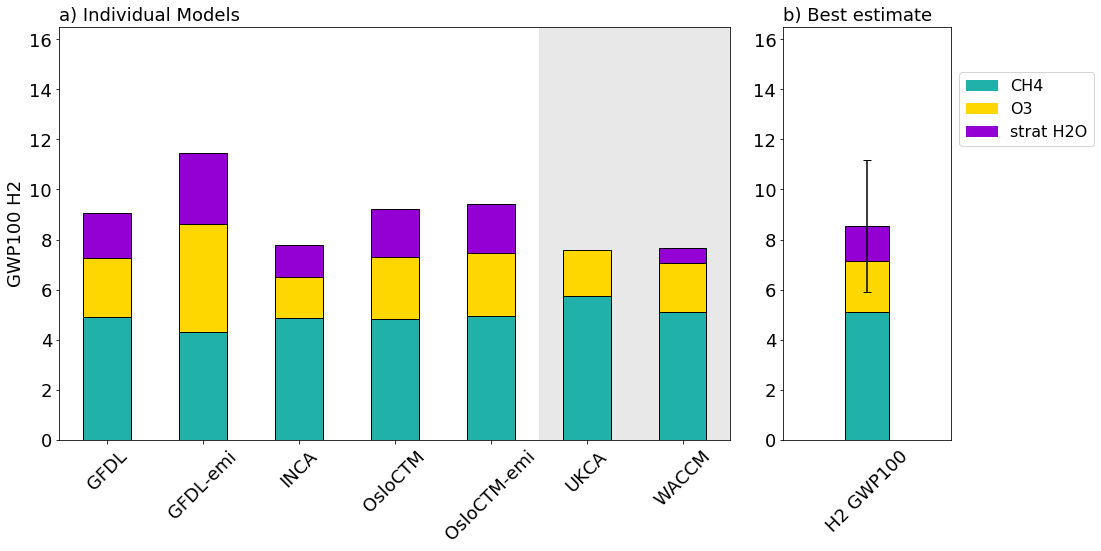

In [36]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(15,8),sharey=True)

gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
axs = plt.subplot(gs[0])


df_table_gwp_simple.drop('Model mean').plot.bar(stacked=True,
                        color=[CH4_color,O3_color, H2O_color],
                        edgecolor='black',
                        ax=axs, 
                        legend = False) 

#print(df_table_gwp_simple.columns)

for m,model in enumerate(df_table_gwp_simple.drop(['GFDL-emi', 'OsloCTM-emi'],axis=0).columns):
        # Read in correct best estimate for stars, now wrong
        if starplot: star,=axs.plot(m,df_table_gwp_simple[model].sum(),color='darkgray',
                       markersize=10,marker='*',linestyle = 'None',label='Harmonized soil sink')
   
#    axs.plot(m,total_drydep_max.loc[model],#

    
#    axs.plot(m,total_drydep_min.loc[model],marker='v',color='black')
#    axs.plot([m,m],[total_drydep_min.loc[model],total_drydep_max.loc[model]],color='black')


axs.axvspan(4.5, 7, alpha=0.5, color='lightgray',zorder=-10)
axs.set_title('a) Individual Models',loc='left')
#bars = [thing for thing in axs.containers if isinstance(thing,mpl.container.BarContainer)]
#i = 0
#
#for b,bar in enumerate(bars):    
#    for p,patch in enumerate(bar):
#        if b == 1 : 
#            patch.set_hatch('\\')
#        if b == 3 : 
#            patch.set_hatch('\\')
#        if b == 5 : 
#            patch.set_hatch('\\')
#        i = i + 1



axs.set_ylabel('GWP100 H2')
plt.ylim((0,16.5))
plt.xticks(rotation = 45)
#axs.set_xticks(rotation=25, horizontalalignment="center")

axs = plt.subplot(gs[1])
x = ['', 'H2 GWP100', ' ']
y1 = [0,df_table_gwp_simple['CH4']['Model mean'],0]
y2 = [0,df_table_gwp_simple['O3']['Model mean'],0]
helpy = [0,df_table_gwp_simple['CH4']['Model mean']+df_table_gwp_simple['O3']['Model mean'],0]
y3 = [0,df_table_gwp_simple['strat H2O']['Model mean'],0]
print(df_table_gwp_simple.loc['Model mean'])
plt.bar(x, y1,color=CH4_color, width = 0.8, edgecolor='black', )
plt.bar(x, y2,color=O3_color, bottom = y1, width = 0.8, edgecolor='black')
plt.bar(x, y3,color=H2O_color, bottom = helpy, width = 0.8, edgecolor='black')

#plt.plot(1,df_table_gwp_best_estimate['Model mean'].loc['Total'],'*')
plt.errorbar(1, df_table_gwp_simple.loc['Model mean'].sum(), yerr=sigma, color='black',capsize=4)
#df_table_gwp_best_estimate['Model mean'].drop('Total').T.plot.bar(stacked=True,
#                        color=[CH4_color,O3_color,  H2O_color],
#                        edgecolor='black',
#                        ax=axs, legend=False) 
plt.ylim((0,16.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) 
#plt.xlim((0.4,0.6))
# Shrink current axis by 20%
box = axs.get_position()
axs.set_position([box.x0, box.y0, box.width * 0.7, box.height])

# Put a legend to the right of the current axis
if starplot:
    axs.legend(loc='center left', bbox_to_anchor=(1, 0.8),handles = [CH4_legend, O3_legend,  H2O_legend, star])   
else:
    axs.legend(loc='center left', bbox_to_anchor=(1, 0.8),handles = [CH4_legend, O3_legend,  H2O_legend])  
axs.set_title('b) Best estimate',loc='left')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('output/Hydrogen_GWP.png', transparent=True)

#df_table_gwp_best_estimate['Model mean']